
# Background Note 

# Probability: Conditional Distributions

# Solutions to Exercises

# By Albert S. Kyle

$\require{\newcommand}$
$\require{\renewcommand}$
$\renewcommand{\sm}{ {\scriptstyle{\text{*}}}}$ 
$\renewcommand{\mm}{{\scriptsize @}}$
$\newcommand{\E}{\mathrm{E}}$
$\newcommand{\e}{\mathrm{e}}$
$\newcommand{\drm}{\mathrm{\, d}}$
$\newcommand{\var}{\mathrm{var}}$
$\newcommand{\stdev}{\mathrm{stdev}}$
$\renewcommand{\t}{^{\mathsf{T}}}$
$\renewcommand{\comma}{\, , \,}$
$\renewcommand{\vec}[1]{\mathbf{#1}}$
$\newcommand{\skew}{\mathrm{skew}}$
$\newcommand{\kurt}{\mathrm{kurt}}$
$\newcommand{\prob}{\textrm{prob}}$
$\newcommand{\midx}{\, \mid \,}$


In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import timeit
import math
import statistics
import nbconvert

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('NumPy version ' + np.__version__)
print('SciPy version ' + scipy.__version__)
print('matplotlib version ' + matplotlib.__version__)

timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print("Timestamp:", timestamp)
tstart = timeit.default_timer()


Python version 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]
Pandas version 1.5.3
NumPy version 1.23.5
SciPy version 1.10.1
matplotlib version 3.7.1
Timestamp: 2023-09-05 16:48:46


## Solutions to Exercises

The Exercises from above are repeated here, with solutions.


### Exercise 1

1. Let $Z_0$ and $Z_1$ be independently distributed random variables with mean 0 and variance 1. For some number $\rho$ with $0 \le \rho \le 1$, define a new random variable $Z_2 = \rho \sm Z_0 + \sqrt{1-\rho^2} \sm Z_1$. Calculate the mean and variance of $Z_2$, the covariance and correlation between $Z_0$ and $Z_2$, and the covariance and correlation between $Z_1$ and $Z_2$. 

2. For $\rho \in \{ -0.95, -0.50, 0.00, +0.25, +0.50, +0.80, +0.95, 0.99 \}$, simulate 100 outcomes of $Z_0$ and $Z_1$ under the assumption that both are normally distributed, then plot the values of $Z_0$ and $Z_2$.

### Solution 1.1

The mean of $Z_2$ is zero since the means of both $Z_0$ and $Z_1$ are zero.

The variance of $Z_2$ is 

\begin{equation}
\begin{aligned}
\var[Z_2] &= \var [\rho \sm Z_0 + \sqrt{1-\rho^2} \sm Z_1] \\
&= \rho^2 \sm \var[Z_0] + (\sqrt{1-\rho^2})^2 \sm \var[Z_1] \\
&= \rho^2 + (1-\rho^2) \\
&= 1
\end{aligned}
\end{equation}

Since $Z_0$, $Z_1$, and $Z_2$ all have mean 0 and variance 1, the covariances and correlations are the same and are given by

\begin{equation}
\begin{aligned}
\corr[Z_0, Z_2] &= \cov[Z_0, Z_2] \\
&= \E[Z_0 \sm Z_2] \\
&= \E[Z_0 \sm (\rho \sm Z_0 + \sqrt{1-\rho^2} \sm Z_1)] \\
&= \rho
\end{aligned}
\end{equation}

Similarly,

\begin{equation}
\begin{aligned}
\corr[Z_1, Z_2] &= \cov[Z_1, Z_2] \\
&= \E[Z_1 \sm Z_2] \\
&= \E[Z_1 \sm (\rho \sm Z_0 + \sqrt{1-\rho^2} \sm Z_1)] \\
&= \sqrt{1-\rho^2}
\end{aligned}
\end{equation}

### Solution 1.2

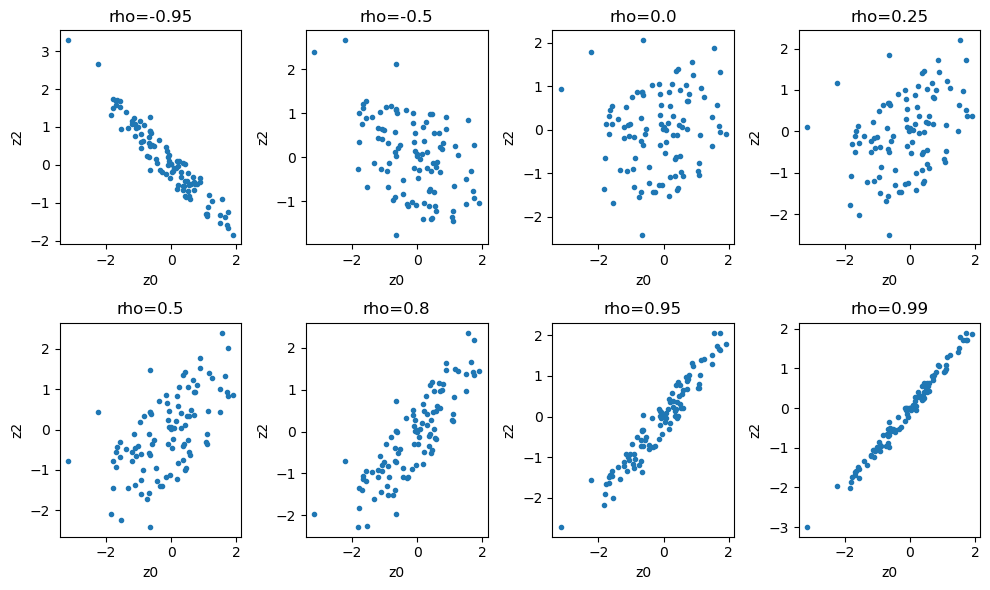

In [2]:
nr, nc = 2, 4

rhos = np.array([[-0.95, -0.50, 0.00, +0.25, +0.50, +0.80, +0.95, 0.99]]).reshape(1, nr, nc)
n = 100

rng = np.random.default_rng()
z0 = rng.standard_normal((n,1,1))
z1 = rng.standard_normal((n,1,1))
z2 = rhos * z0 + np.sqrt(1 - rhos * rhos) * z1

fig, ax = plt.subplots(nr, nc, figsize=[10,6])
for r in range(nr):
    for c in range(nc):
        ax[r, c].set_title("rho=" + str(rhos[0, r, c]))
        ax[r, c].set_xlabel("z0")
        ax[r, c].set_ylabel("z2")
        ax[r, c].plot(z0[:,0,0], z2[:, r, c], 'o', ms=3.00)
plt.tight_layout()        
plt.show()


### Exercise 2

Suppose the unconditional (marginal) open-to-close stock return is $R=+5$ percent for $U$ and the unconditional expected net return is zero (which defines $D$), with the earnings announcement made after the close.  Suppose that the earnings announcement is more likely to be high after the stock prices goes up than after the stock price goes down.  To be specific, the conditional probability of earnings given stock prices is

\begin{equation}
f_{Y\midx R}(y\midx r) = 
\left\{ 
\begin{array}{ll}
0.65 & \text{if } r = U \text{ and } y = H ,\\
0.35 & \text{if } r = U \text{ and } y = L ,\\
0.55 & \text{if } r = D \text{ and } y = H ,\\
0.45 & \text{if } r = D \text{ and } y = L .\\
\end{array} 
\right. .
\end{equation}

1. Describe the joint pmf of $R$ and $Y$.

2. Describe the marginal pmf for $Y$.

3. Describe the conditional pmf for $R$ given $Y$.

4. If you knew whether the earnings announcement was going to be high $H$ or low $L$ before the stock opened, how large a return can you make day-trading the stock, buying or selling on the open and unwinding the position on the close. Are your profits larger when you observe $H$ or when you observe $L$? (Note that you are liquidating your bet before the earnings are announced because you are betting on how well the market can predict the earnings announcement, not what the earnings announcement will actually be.) 



### Solution 2.1, 2.2, 2.3, 2.4


In [3]:

phcu = 0.65  # prob p of high h conditional c on up u
assert ((0 < phcu) & (phcu < 1)), "Probabiity phcu should be in (0,1)."
plcu = 1 - phcu
phcd = 0.55
assert ((0 < phcd) & (phcd < 1)), "Probabiity phcd should be in (0,1)."
plcd = 1 - phcd

pu = 0.50
pdd = 1 - pu  # not pd since pd means "pandas"
assert ((0 < pu) & (pdd < 1)), "Probabiity phcd should be in (0,1)."

u = 1.05
d = (1.00 - pu * u) / pdd # Force E[R] = 0.00

print(f"Assumed conditional pmf of Y \midx  R: {phcu=}, {phcd=}, {plcu=}, {plcd=}")
print(f"Assumed marginal pmf of R: {pu=}, {pdd=}")

# Calculate joint pmf from conditional and marginal:

puh = phcu * pu
pul = plcu * pu
pdh = phcd * pdd
pdl = plcd * pdd

print(f"\n2.1: Joint pmf of Y and R: {puh=}, {pul=}, {pdh=}, {pdl=}")

# Marginal pmf for Y from joint pmf:

ph = puh + pdh
pl = pul + pdl

print(f"\n2.2: Marginal pmf of Y: {ph=}, {pl=}")

# Conditional pmf for Y using Bayes' Law:

puch = phcu * pu / ph
pdch = phcd * pdd / ph
pucl = plcu * pu / pl
pdcl = plcd * pdd / pl

print(f"\n2.3: Conditional pmf of R \midx  Y: {puch=}, {pdch=}, {pucl=}, {pdcl=}")

# Unconditional expectation of R:

Er = u * pu + d * pdd

# Conditional expectation of R given Y:

Erch = u * puch + d * pdch
Ercl = u * pucl + d * pdcl

print(f"\n2.4: Conditional expectation of R \midx  Y: {Erch=}, {Ercl=}")

print(f"\nConsistency checks:")
print(f"Unconditional expected return should be 1.00: {Er=}")
print(f"Should be exactly 1.00: {puh + pul + pdh + pdl=}")
print(f"Should be exactly 1.00: {ph + pl=}")
print(f"Should be exactly 1.00: {pu + pdd=}")
print(f"Should be exactly 1.00: {puch + pdch=}")
print(f"Should be exactly 1.00: {pucl + pdcl=}")

print(f"\nConsistency checks using np.isclose(...):")
print(np.isclose(Er, 1.00, rtol=1e-10, atol=1e-10))
print(np.isclose(puh + pul + pdh + pdl, 1.00, rtol=1e-10, atol=1e-10))
print(np.isclose(ph + pl, 1.00, rtol=1e-10, atol=1e-10))
print(np.isclose(puch + pdch, 1.00, rtol=1e-10, atol=1e-10))
print(np.isclose(pucl + pdcl, 1.00, rtol=1e-10, atol=1e-10))

assert np.isclose(Er, 1.00, rtol=1e-10, atol=1e-10), "Expected payoff should be 1.00."
assert np.isclose(puh + pul + pdh + pdl, 1.00, rtol=1e-10, atol=1e-10), "Joint pmf should sum to 1.00."
assert np.isclose(ph + pl, 1.00, rtol=1e-10, atol=1e-10), "Marginal pmf should sum to 1.00."
assert np.isclose(puch + pdch, 1.00, rtol=1e-10, atol=1e-10), "Conditional pmf should sum to 1.00."
assert np.isclose(pucl + pdcl, 1.00, rtol=1e-10, atol=1e-10), "Conditional pmf should sum to 1.00."




Assumed conditional pmf of Y \midx  R: phcu=0.65, phcd=0.55, plcu=0.35, plcd=0.44999999999999996
Assumed marginal pmf of R: pu=0.5, pdd=0.5

2.1: Joint pmf of Y and R: puh=0.325, pul=0.175, pdh=0.275, pdl=0.22499999999999998

2.2: Marginal pmf of Y: ph=0.6000000000000001, pl=0.39999999999999997

2.3: Conditional pmf of R \midx  Y: puch=0.5416666666666666, pdch=0.4583333333333333, pucl=0.4375, pdcl=0.5625

2.4: Conditional expectation of R \midx  Y: Erch=1.0041666666666667, Ercl=0.9937499999999999

Consistency checks:
Unconditional expected return should be 1.00: Er=1.0
Should be exactly 1.00: puh + pul + pdh + pdl=1.0
Should be exactly 1.00: ph + pl=1.0
Should be exactly 1.00: pu + pdd=1.0
Should be exactly 1.00: puch + pdch=1.0
Should be exactly 1.00: pucl + pdcl=1.0

Consistency checks using np.isclose(...):
True
True
True
True
True


#### Comments on solution 2.4

For the given parameters, high earnings announcements $H$ are more likely than low ones $L$. There is more profit to be made by selling short after observing that the earnings announcement will be low $L$ (62.5 basis points) than after observing high $H$ (42 basis points).

### Programming advice on Solution 2

It is good practice not to hard-code assumpitons but rather to make them explicit.  

It is also good practice not to make explicit assumptions which are redundant.  Since probabilities sum to one (i.e.,`pu + pd == 1` is True), it is better to write `pu = 0.50; pd = 1.00 - pu` than to write `pu, pd = 0.50, 0.50`. The latter is error prone since you may change one probability of 0.50 but forget to change the other one.

Calculations based on Bayes' Law are error-prone because various different cases must be juggled consistently.  Including numerous obvious consistency checks is a good way to catch errors.

Using `np.isclose(...)` is a good way to add consistency checks.

Using `assert` is also a good way to catch your own logical errors. 

If this were written as a function with four inputs (`phcu`, `phcd`, `pu`,`u`)---(Why only four?)---exceptions could be used to catch inconsistent inputs by a user.  Since you are your own user in this case, `assert` is also appropriate.

I have redundantly included `assert...` and `isclose()` to illustrate usage. The prints of consistency checks are, of course, doubly redundant, but are useful for debugging.

If you were writing code implementing Bayes' Law in the context of a big project, perhaps with multiple participants, consider using asserts or exceptions.

In [4]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
tfinish = timeit.default_timer()
print(f"Finished: {timestamp = }\nExecution time = {tfinish - tstart} s")


Finished: timestamp = '2023-09-05 16:48:49'
Execution time = 2.8313262999999997 s
